load images and assign label from folder name

use pretrained classifier 
train classifier to predict document type


limited by black and white because pretrained models are trained on colour images
Can you use this pretrained model? How would you go about training your own?

READ.me file descriping results and what they mean!


In [1]:
# load packages
import cv2
import os

# tf tools
import tensorflow as tf

# image processsing
from tensorflow.keras.preprocessing.image import (load_img,
                                                  img_to_array,
                                                  ImageDataGenerator)
# VGG16 model
from tensorflow.keras.applications.vgg16 import (preprocess_input,
                                                 decode_predictions,
                                                 VGG16)
# cifar10 data - 32x32
from tensorflow.keras.datasets import cifar10

# layers
from tensorflow.keras.layers import (Flatten, 
                                     Dense, 
                                     Dropout, 
                                     BatchNormalization)
# generic model object
from tensorflow.keras.models import Model

# optimizers
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import SGD, Adam

#scikit-learn
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

# for plotting
import numpy as np
import matplotlib.pyplot as plt

2024-04-11 10:45:14.275360: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [36]:
# load the model
model = VGG16()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [3]:
# load images
data_path = os.path.join("..","..","..","cds-vis-data","Tobacco3482")
dirs = sorted(os.listdir(data_path))
labels = []

In [8]:

for directory in dirs:
    subfolder = data_path +"/"+ directory
    filenames = (sorted(os.listdir(subfolder)))
    if os.path.isdir(subfolder):
            labels.append(subfolder)
    
    images = [] 

    for image in filenames:
        path = (subfolder +"/"+ image)
        if image.endswith(".jpg"):
            image = load_img(path, target_size=(224, 224))
            
        else:
            print("Skipping", image)


Skipping Thumbs.db
Skipping Thumbs.db
Skipping Thumbs.db
Skipping Thumbs.db
Skipping Thumbs.db
Skipping Thumbs.db
Skipping Thumbs.db
Skipping Thumbs.db
Skipping Thumbs.db
Skipping Thumbs.db


In [31]:
def list_subfolders(directory):
    subfolders = []
    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)
        if os.path.isdir(item_path):
            subfolders.append(item)
    return subfolders

def load_images_from_subfolders(directory):
    subfolders = list_subfolders(directory)
    images = {}
    for subfolder in subfolders:
        subfolder_path = os.path.join(directory, subfolder)
        image_files = []
        for file_name in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, file_name)
            if file_name.lower().endswith(('.jpg')):
                image = load_img(file_path, target_size=(224, 224))
                if image is not None:
                    image = img_to_array(image)
                    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
                    image = preprocess_input(image)
                    image_files.append(image)
        images[subfolder] = image_files
    return images

In [32]:
directory_path = os.path.join("..","..","..","cds-vis-data","Tobacco3482")

subfolder_names = list_subfolders(directory_path)

In [33]:
subfolder_images = load_images_from_subfolders(directory_path)


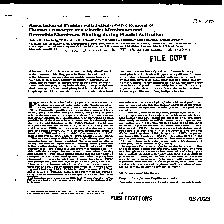

In [27]:
# Display the selected image
subfolder_images[subfolder_names[7]][9]

In [34]:
subfolder_images



{'Report': [array([[[[151.061  , 138.22101, 131.32   ],
           [151.061  , 138.22101, 131.32   ],
           [151.061  , 138.22101, 131.32   ],
           ...,
           [151.061  , 138.22101, 131.32   ],
           [151.061  , 138.22101, 131.32   ],
           [151.061  , 138.22101, 131.32   ]],
  
          [[151.061  , 138.22101, 131.32   ],
           [151.061  , 138.22101, 131.32   ],
           [151.061  , 138.22101, 131.32   ],
           ...,
           [151.061  , 138.22101, 131.32   ],
           [151.061  , 138.22101, 131.32   ],
           [151.061  , 138.22101, 131.32   ]],
  
          [[151.061  , 138.22101, 131.32   ],
           [151.061  , 138.22101, 131.32   ],
           [151.061  , 138.22101, 131.32   ],
           ...,
           [151.061  , 138.22101, 131.32   ],
           [151.061  , 138.22101, 131.32   ],
           [151.061  , 138.22101, 131.32   ]],
  
          ...,
  
          [[151.061  , 138.22101, 131.32   ],
           [151.061  , 138.22101, 131.

In [39]:
subfolder_names

['Report',
 'ADVE',
 'Form',
 'News',
 'Memo',
 'Letter',
 'Email',
 'Scientific',
 'Note',
 'Resume']

In [30]:
image

NameError: name 'image' is not defined